# Olympic dataset

https://www.kaggle.com/marcogdepinto/let-s-discover-more-about-the-olympic-games

# Imports

In [38]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib notebook
# interactive version
%matplotlib inline
import seaborn as sns
import random
sns.set(
    context='notebook',  # {paper, notebook, talk, poster}
    style='darkgrid',    # {darkgrid, whitegrid, ticks}
    palette='deep',         # {deep, muted, bright, pastel, dark, colorblind}
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
import os

# Read data

In [2]:
data = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

## Verify data is read

In [3]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# Check df info

## Column names

In [5]:
data_column_names = list(data.columns)
data_column_names

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [6]:
region_column_names = list(region.columns)
region_column_names

['NOC', 'region', 'notes']

## Understand the columns

ID - Unique number for each athlete;

Name - Athlete's name;

Sex - M or F;

Age - Integer;

Height - In centimeters;

Weight - In kilograms;

Team - Team name;

NOC - National Olympic Committee 3-letter code;

Games - Year and season;

Year - Integer;

Season - Summer or Winter;

City - Host city;

Sport - Sport;

Event - Event;

Medal - Gold, Silver, Bronze, or NA.


## Check for columns to merge on

In [7]:
set(data_column_names).intersection(set(region_column_names))
# We know that we can merge on NOC

{'NOC'}

### Check that 'NOC' column values are consistent

In [8]:
data_unique_NOC = set(data['NOC'].unique())

In [9]:
region_unique_NOC = set(region['NOC'].unique())

In [10]:
data_unique_NOC.difference(region_unique_NOC)

{'SGP'}

In [11]:
region_unique_NOC.difference(data_unique_NOC)
# There is one column value difference

{'SIN'}

#### Replace SIN with SGP in region df

In [12]:
region['NOC'].replace(to_replace=['SIN'], value=['SGP']).head()

0    AFG
1    AHO
2    ALB
3    ALG
4    AND
Name: NOC, dtype: object

#### Verify replacement, i.e. column values are consistent with data df

In [13]:
region_unique_NOC = set(region['NOC'].unique())

In [14]:
region_unique_NOC.difference(data_unique_NOC)
# Empty set is good

{'SIN'}

## Check basic info

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Check basic statistics

In [16]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Merge dataframes

In [17]:
merged = pd.merge(data, region, on='NOC', how='outer', sort=True)

## Check merged

In [18]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN


# Problem 1: Distribution of the age of gold medalists

In [19]:
# Univariate count problem - number in each age category i.e. a histogram plot
# Slice out merged such that medals=gold only

In [20]:
df1 = merged[merged['Medal']=='Gold']
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
449,14046.0,Hassiba Boulmerka,F,24.0,158.0,49.0,Algeria,ALG,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
666,73857.0,Taoufik Makhloufi,M,24.0,170.0,67.0,Algeria,ALG,2012 Summer,2012.0,Summer,London,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
690,78805.0,Nouria Mrah-Benida,F,29.0,162.0,54.0,Algeria,ALG,2000 Summer,2000.0,Summer,Sydney,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
708,81861.0,Noureddine Morceli,M,26.0,175.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
784,112998.0,Hocine Soltani,M,23.0,165.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Boxing,Boxing Men's Lightweight,Gold,Algeria,NaN


## Data cleaning

### Null values

Better to remove null values for data that might vary with category e.g. weight/height of men/women/sports category

In [21]:
# Check for null values in age
df1['Age'].isna().any()

True

In [22]:
df1 = df1[np.isfinite(df1['Age'])]
df1['Age'].isna().any()

False

## Histogram plot

Text(0.5, 1.0, 'Distribution of Gold Medals')

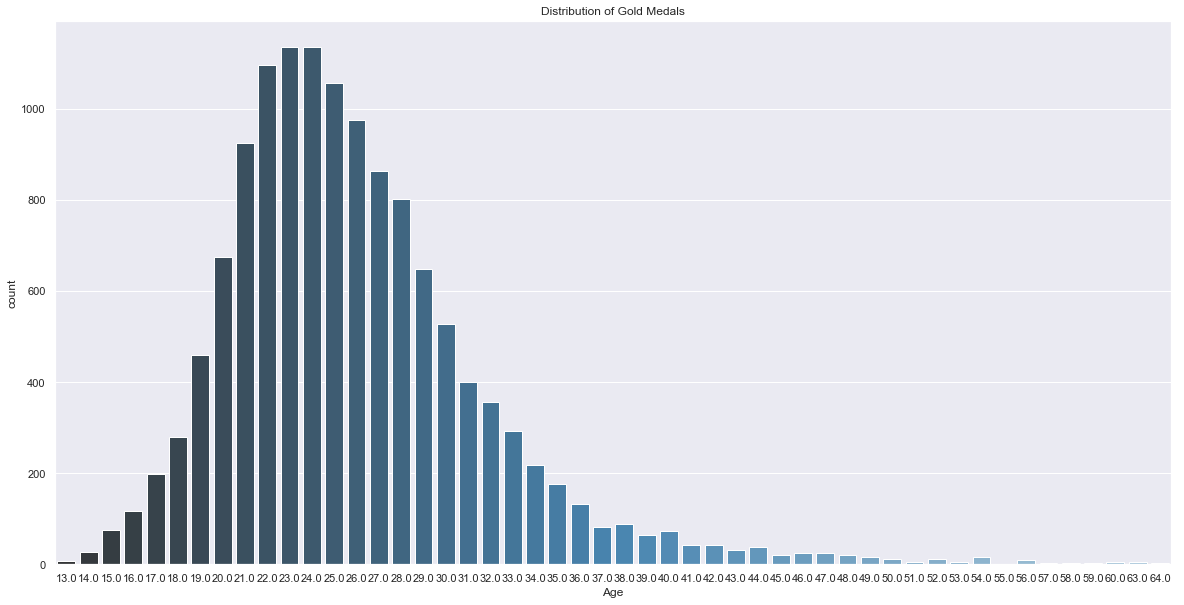

In [39]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(df1['Age'],palette="Blues_d")
# https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/
# https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
plt.title('Distribution of Gold Medals')

# Problem 2: How many gold medalists are above age 50

In [24]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
449,14046.0,Hassiba Boulmerka,F,24.0,158.0,49.0,Algeria,ALG,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
666,73857.0,Taoufik Makhloufi,M,24.0,170.0,67.0,Algeria,ALG,2012 Summer,2012.0,Summer,London,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
690,78805.0,Nouria Mrah-Benida,F,29.0,162.0,54.0,Algeria,ALG,2000 Summer,2000.0,Summer,Sydney,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
708,81861.0,Noureddine Morceli,M,26.0,175.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
784,112998.0,Hocine Soltani,M,23.0,165.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Boxing,Boxing Men's Lightweight,Gold,Algeria,NaN


In [25]:
df1['ID'][df1['Age'] > 50].count()

65

# Problem 3: which disciplines allows you to land a gold medal after your fifties?

In [26]:
disciplines = df1['Sport'][df1['Age'] > 50]

Text(0.5, 1.0, 'Sports over 50')

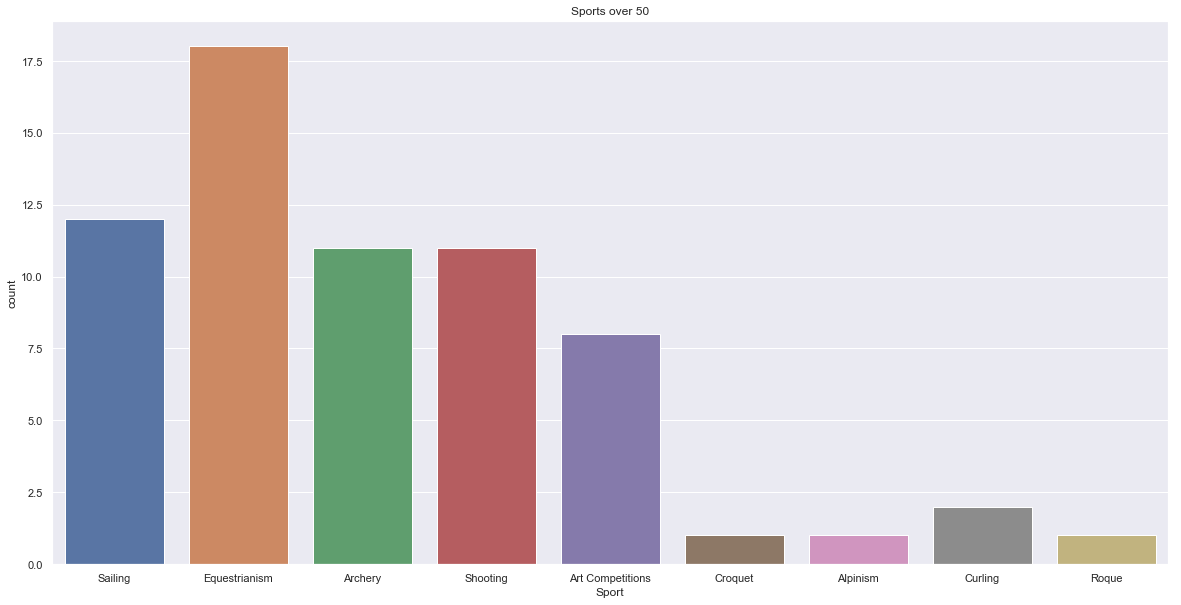

In [40]:
plt.figure(figsize=(20, 10))
sns.countplot(disciplines)
plt.title('Sports over 50')

# Problem 4: Women medals per edition of the Games

## Filter only women from merged

In [28]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN


In [29]:
df2 = merged[merged['Sex']=='F']
df2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
57,61961.0,Tahmina Kohistani,F,23.0,160.0,52.0,Afghanistan,AFG,2012 Summer,2012.0,Summer,London,Athletics,Athletics Women's 100 metres,NaN,Afghanistan,NaN
82,99303.0,Friba Razayee,F,18.0,165.0,70.0,Afghanistan,AFG,2004 Summer,2004.0,Summer,Athina,Judo,Judo Women's Middleweight,NaN,Afghanistan,NaN
114,132125.0,Robina Muqim Yaar,F,18.0,180.0,56.0,Afghanistan,AFG,2004 Summer,2004.0,Summer,Athina,Athletics,Athletics Women's 100 metres,NaN,Afghanistan,NaN
115,132125.0,Robina Muqim Yaar,F,22.0,180.0,56.0,Afghanistan,AFG,2008 Summer,2008.0,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN,Afghanistan,NaN
117,133277.0,Kamia Yousufi,F,20.0,165.0,55.0,Afghanistan,AFG,2016 Summer,2016.0,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN,Afghanistan,NaN


## Plot

Text(0.5, 1.0, 'Women medals per edition of the Games')

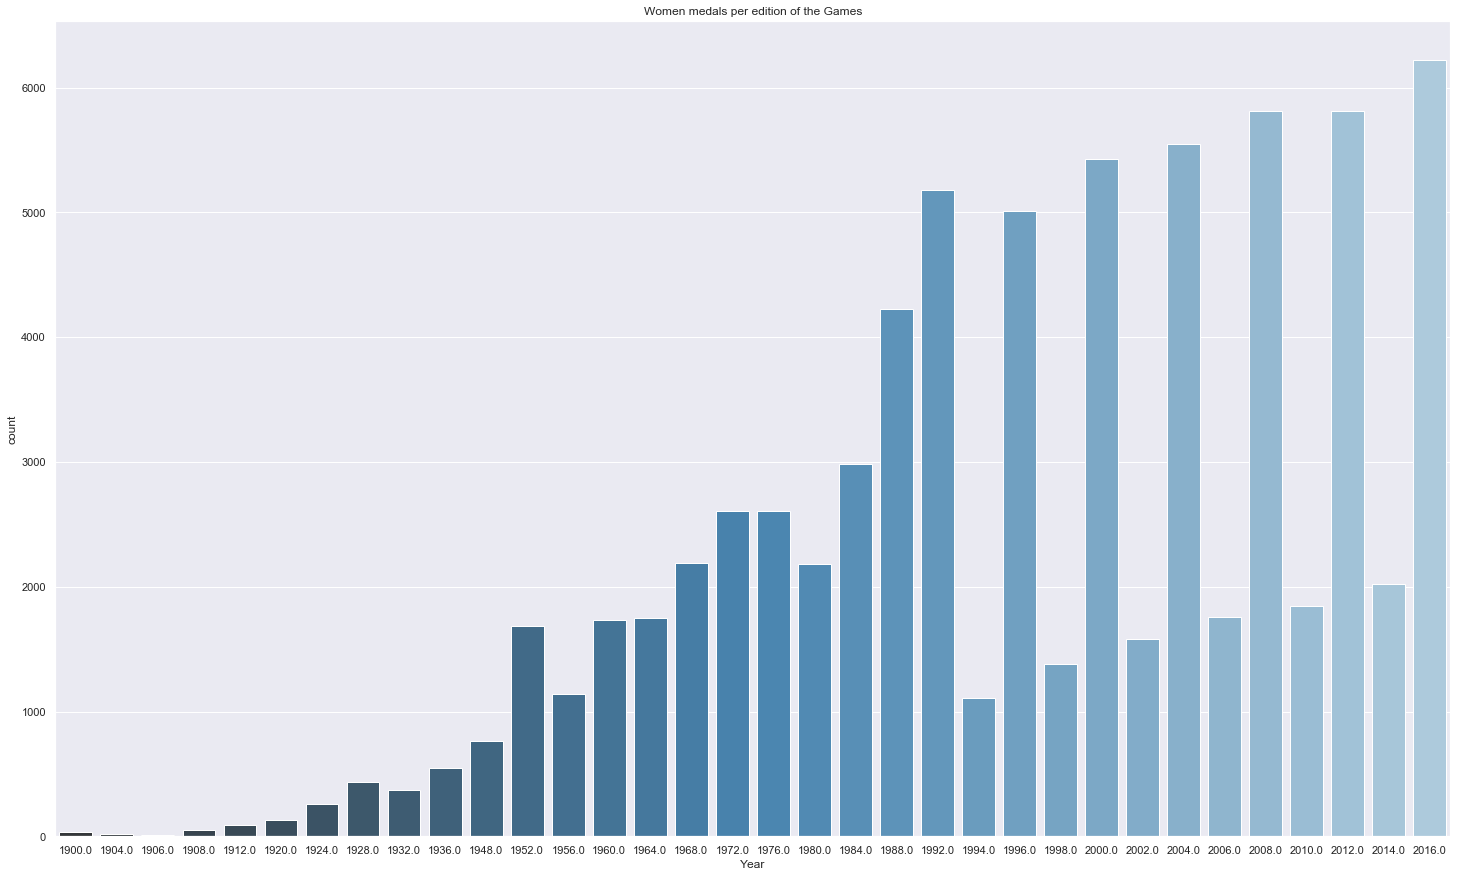

In [41]:
plt.figure(figsize=(25, 15))
sns.countplot(x='Year', data=df2, palette="Blues_d")
plt.title('Women medals per edition of the Games')

### Check plot is correct

In [31]:
df2['ID'].loc[df2['Year'] == 1980].count()

2186

# Problem 5: Gold medals per country

In [32]:
df1.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271043,97036.0,"Christine Seraphine ""Chris"" Prinsloo",F,28.0,156.0,47.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN
271049,101386.0,Sonia Robertson (Chick-),F,33.0,168.0,60.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN
271063,115129.0,Anthea Dorine Stewart (Allin-),F,35.0,160.0,56.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN
271101,127168.0,Helen Volk,F,26.0,150.0,55.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN
271106,128977.0,Linda Margaret Watson,F,24.0,165.0,63.0,Zimbabwe,ZIM,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Women's Hockey,Gold,Zimbabwe,NaN


In [70]:
df3 = df1['Medal'].groupby(df1['NOC']).count().reset_index()
df3.head()

,NOC,Medal
0,ALG,5
1,ANZ,20
2,ARG,91
3,ARM,2
4,AUS,346


In [73]:
df4 = df3.sort_values(by=['Medal'], ascending=[False]).reset_index(drop=True).head(5)
df4

,NOC,Medal
0,USA,2627
1,URS,1082
2,GER,737
3,GBR,657
4,ITA,567


Text(0.5, 1.0, 'Medals per Country')

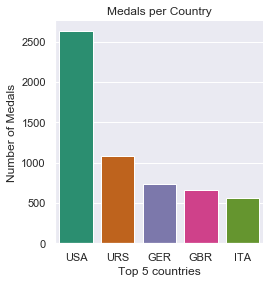

In [86]:
g = sns.catplot(x='NOC',y='Medal', data=df4, kind='bar', height=4, aspect=1, palette='Dark2')
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

# Problem 6: Disciplines with the greatest number of Gold Medals in USA

In [88]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
449,14046.0,Hassiba Boulmerka,F,24.0,158.0,49.0,Algeria,ALG,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
666,73857.0,Taoufik Makhloufi,M,24.0,170.0,67.0,Algeria,ALG,2012 Summer,2012.0,Summer,London,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
690,78805.0,Nouria Mrah-Benida,F,29.0,162.0,54.0,Algeria,ALG,2000 Summer,2000.0,Summer,Sydney,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
708,81861.0,Noureddine Morceli,M,26.0,175.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
784,112998.0,Hocine Soltani,M,23.0,165.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Boxing,Boxing Men's Lightweight,Gold,Algeria,NaN


In [91]:
USA_medals = df1[df1['NOC']=='USA']
USA_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
247428,150.0,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900.0,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
247437,351.0,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000.0,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,USA,NaN
247440,404.0,"Louis Grenville ""Lou"" Abell",M,15.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900.0,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold,USA,NaN
247441,404.0,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,USA,1904 Summer,1904.0,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold,USA,NaN
247442,423.0,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000.0,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold,USA,NaN


In [104]:
USA_count = USA_medals['ID'].groupby(
    USA_medals['Sport']).count().sort_values(ascending=False).reset_index()
USA_count.head(5)

,Sport,ID
0,Swimming,649
1,Athletics,542
2,Basketball,281
3,Rowing,184
4,Shooting,117


Text(0.5, 1.0, 'Most medals won in USA')

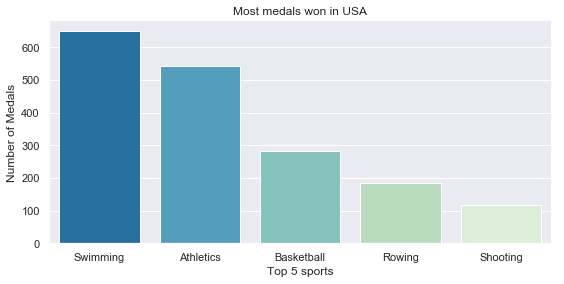

In [119]:
g = sns.catplot(x='Sport',
                y='ID',
                data=USA_count.head(5),
                kind='bar',
                height=4,
                aspect=2,
                palette='GnBu_r')
g.set_xlabels("Top 5 sports")
g.set_ylabels("Number of Medals")
plt.title('Most medals won in USA')

# Note that this is individual medals, medal by team would be more appropriate

# Problem 7: Count the gold medals won in basketball per team/year in USA

In [109]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
449,14046.0,Hassiba Boulmerka,F,24.0,158.0,49.0,Algeria,ALG,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
666,73857.0,Taoufik Makhloufi,M,24.0,170.0,67.0,Algeria,ALG,2012 Summer,2012.0,Summer,London,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
690,78805.0,Nouria Mrah-Benida,F,29.0,162.0,54.0,Algeria,ALG,2000 Summer,2000.0,Summer,Sydney,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
708,81861.0,Noureddine Morceli,M,26.0,175.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
784,112998.0,Hocine Soltani,M,23.0,165.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Boxing,Boxing Men's Lightweight,Gold,Algeria,NaN


In [126]:
Mbasketball = USA_medals[(USA_medals['Sport']=='Basketball') & (USA_medals['Sex']=='M')]
Mbasketball.sort_values(by='Year', ascending = True).head(5)
# Check it is sorted correctly

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
255700,55375.0,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936.0,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
257586,71965.0,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936.0,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
259109,81220.0,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936.0,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
253289,40143.0,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936.0,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
260719,95095.0,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936.0,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN


## Create a new dataframe to make a pre-filter using only the first record for each member of the team.

In [117]:
groupedBasketUSA = Mbasketball.groupby(['Year']).first()
groupedBasketUSA
groupedBasketUSA['ID'].count()

15

# Problem 8: What is the median height/weight of an Olympic medalist?

In [120]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
449,14046.0,Hassiba Boulmerka,F,24.0,158.0,49.0,Algeria,ALG,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
666,73857.0,Taoufik Makhloufi,M,24.0,170.0,67.0,Algeria,ALG,2012 Summer,2012.0,Summer,London,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
690,78805.0,Nouria Mrah-Benida,F,29.0,162.0,54.0,Algeria,ALG,2000 Summer,2000.0,Summer,Sydney,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
708,81861.0,Noureddine Morceli,M,26.0,175.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
784,112998.0,Hocine Soltani,M,23.0,165.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Boxing,Boxing Men's Lightweight,Gold,Algeria,NaN


In [135]:
df1.groupby('Sex').median().reset_index()
# Quick look - it will ignore null values
# There seems to be significant difference in median of height/weight between genders, might not
# be best option to group them together

,Sex,ID,Age,Height,Weight,Year
0,F,70587.0,24.0,170.0,63.0,1998.0
1,M,68253.0,25.0,182.0,79.0,1972.0


Text(0, 0.5, 'Height(cm)')

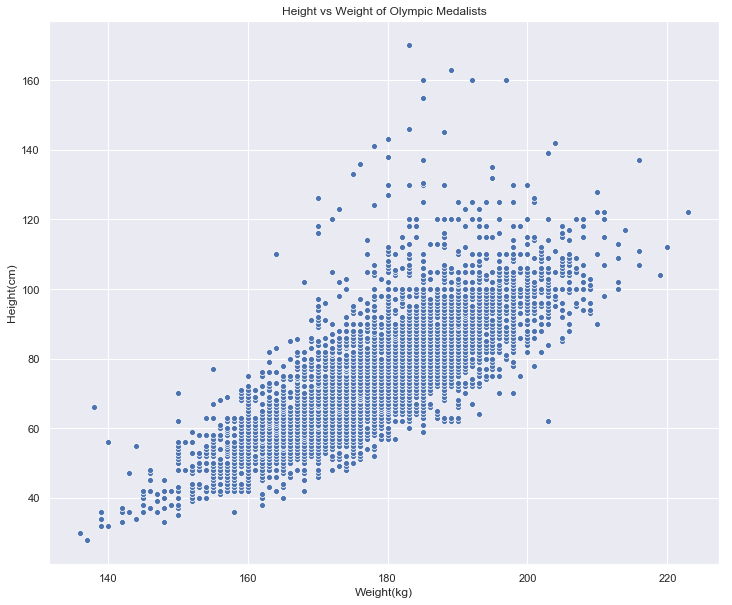

In [163]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=df6)
plt.title('Height vs Weight of Olympic Medalists')
plt.xlabel("Weight(kg)")
plt.ylabel("Height(cm)")

# Problem 9: Which is the athlete that weighs more than 160 kilograms

In [167]:
df1['Sport'][df1['Weight']>160]

205217    Weightlifting
246721    Weightlifting
246722    Weightlifting
Name: Sport, dtype: object

# Problem 10: Evolution of the Olympics over time

## Variation of male/female athletes over time (Summer Games)

In [168]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN


In [182]:
MenOverTime = merged[(merged['Season'] == 'Summer') & (merged['Sex']=='M')]
MenOverTime.drop(labels=['Season','Sex'],axis=1, inplace=True)
MenOverTime.head()

D:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes
0,502.0,Ahmad Shah Abouwi,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
1,1076.0,Jammal-ud-Din Affendi,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
2,1101.0,Mohammad Anwar Afzal,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,London,Football,Football Men's Football,NaN,Afghanistan,NaN
3,1745.0,Mohammad Aktar,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
4,4628.0,Mohammad Daoud Anwary,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN


In [195]:
groupedMen = MenOverTime['ID'].groupby(MenOverTime['Year']).count().reset_index()
groupedMen.head()

,Year,ID
0,1896.0,380
1,1900.0,1903
2,1904.0,1285
3,1906.0,1722
4,1908.0,3054


Text(0.5, 1.0, 'Variation of Male Athletes over time')

<Figure size 1440x720 with 0 Axes>

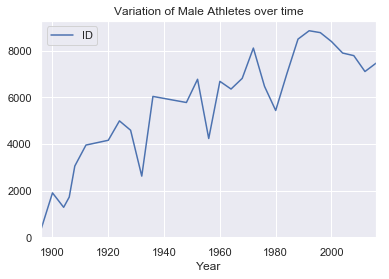

In [196]:
plt.figure(figsize=(20, 10))
groupedMen.plot(x='Year', y='ID') # Pandas plot
plt.title('Variation of Male Athletes over time')

In [197]:
WomenOverTime = merged[(merged['Season'] == 'Summer') & (merged['Sex']=='F')]
WomenOverTime.drop(labels=['Season','Sex'],axis=1, inplace=True)
WomenOverTime.head()

D:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes
57,61961.0,Tahmina Kohistani,23.0,160.0,52.0,Afghanistan,AFG,2012 Summer,2012.0,London,Athletics,Athletics Women's 100 metres,NaN,Afghanistan,NaN
82,99303.0,Friba Razayee,18.0,165.0,70.0,Afghanistan,AFG,2004 Summer,2004.0,Athina,Judo,Judo Women's Middleweight,NaN,Afghanistan,NaN
114,132125.0,Robina Muqim Yaar,18.0,180.0,56.0,Afghanistan,AFG,2004 Summer,2004.0,Athina,Athletics,Athletics Women's 100 metres,NaN,Afghanistan,NaN
115,132125.0,Robina Muqim Yaar,22.0,180.0,56.0,Afghanistan,AFG,2008 Summer,2008.0,Beijing,Athletics,Athletics Women's 100 metres,NaN,Afghanistan,NaN
117,133277.0,Kamia Yousufi,20.0,165.0,55.0,Afghanistan,AFG,2016 Summer,2016.0,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN,Afghanistan,NaN


In [198]:
groupedWomen = WomenOverTime['ID'].groupby(WomenOverTime['Year']).count().reset_index()
groupedWomen.head()

,Year,ID
0,1900.0,33
1,1904.0,16
2,1906.0,11
3,1908.0,47
4,1912.0,87


Text(0.5, 1.0, 'Variation of Female Athletes over time')

<Figure size 1440x720 with 0 Axes>

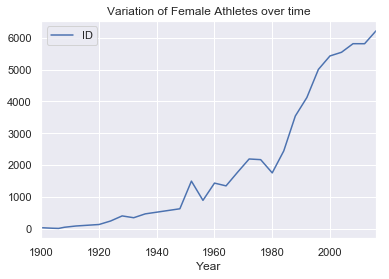

In [200]:
plt.figure(figsize=(20, 10))
groupedWomen.plot(x='Year', y='ID') # Pandas plot
plt.title('Variation of Female Athletes over time')

Text(0.5, 1.0, 'Comparison of participation by gender over time')

<Figure size 1440x720 with 0 Axes>

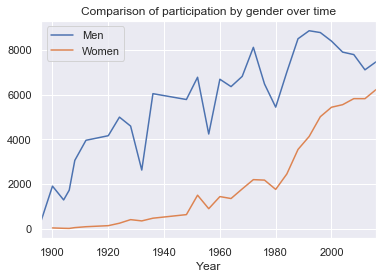

In [204]:
plt.figure(figsize=(20, 10))
ax = groupedMen.plot(x='Year', y='ID', label='Men') # Pandas plot
groupedWomen.plot(x='Year', y='ID', ax=ax, label="Women") # Pandas plot
plt.title('Comparison of participation by gender over time')

## Variation of age by gender along time

### Male

Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

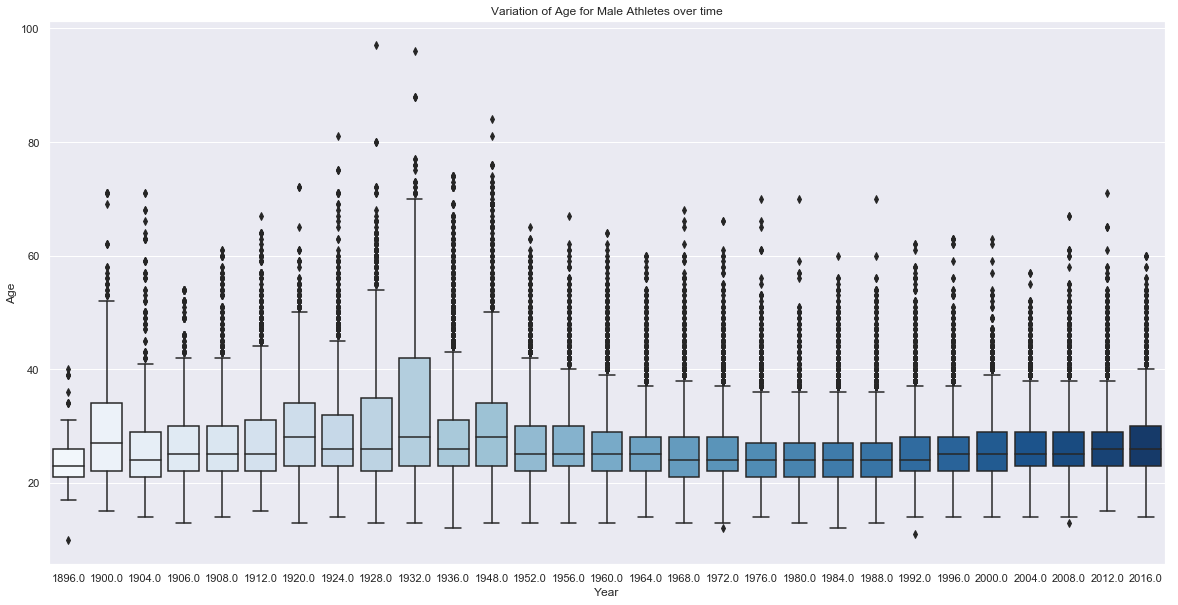

In [223]:
plt.figure(figsize=(20,10))
sns.boxplot('Year', 'Age', data=MenOverTime, palette='Blues')
plt.title('Variation of Age for Male Athletes over time')

# Observations:
# Alot of outliers above 60-100 between 1924-1948

#### Investigating presence of age outliers from 1924-1948

In [227]:
MenOverTime.loc[MenOverTime['Age'] > 80].head(10)
# Art competitions formed part of the modern Olympic Games during its early years, from 1912 to 1948.

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes
38942,77710.0,Robert Tait McKenzie,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948.0,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN,Canada,NaN
87506,118789.0,Louis Tauzin,81.0,NaN,NaN,France,FRA,1924 Summer,1924.0,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN,France,NaN
92291,5146.0,George Denholm Armour,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948.0,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
251994,31173.0,Thomas Cowperthwait Eakins,88.0,NaN,NaN,United States,USA,1932 Summer,1932.0,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
251995,31173.0,Thomas Cowperthwait Eakins,88.0,NaN,NaN,United States,USA,1932 Summer,1932.0,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
251996,31173.0,Thomas Cowperthwait Eakins,88.0,NaN,NaN,United States,USA,1932 Summer,1932.0,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
254942,49663.0,Winslow Homer,96.0,NaN,NaN,United States,USA,1932 Summer,1932.0,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN
265052,128719.0,John Quincy Adams Ward,97.0,NaN,NaN,United States,USA,1928 Summer,1928.0,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


### Female

Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

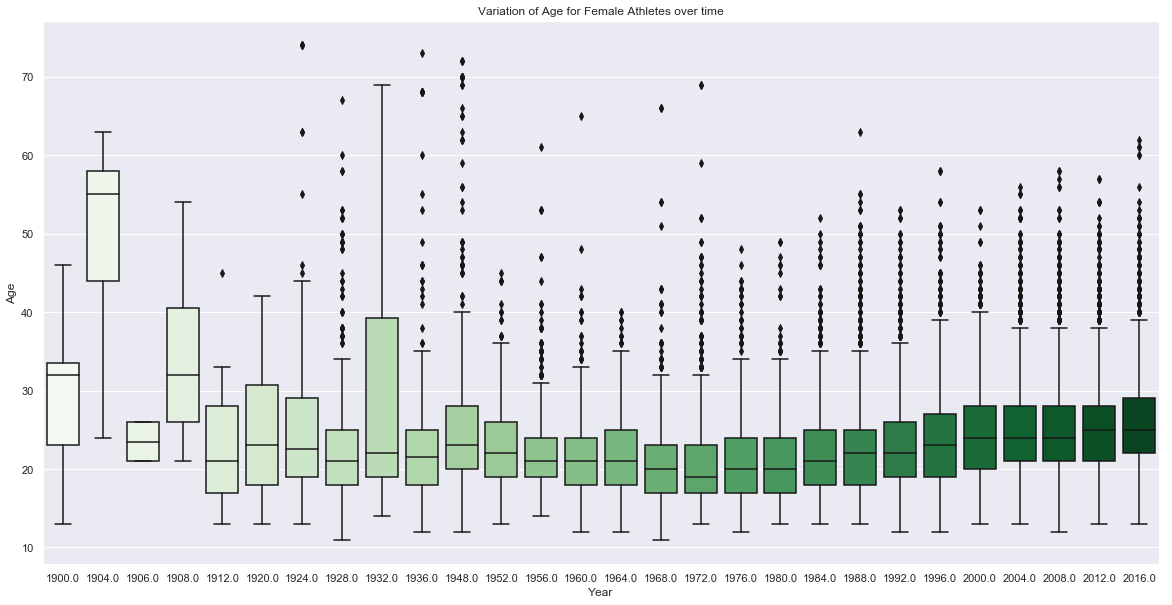

In [228]:
plt.figure(figsize=(20,10))
sns.boxplot('Year', 'Age', data=WomenOverTime, palette='Greens')
plt.title('Variation of Age for Female Athletes over time')

# Observations:
# Generally, the age distribution starts has a lower minimum and a lower maximum
# In 1904 the age distribution is strongly different from the other Olympics

#### Investigating 1904 abnormal data

In [232]:
Abnormal = WomenOverTime[WomenOverTime['Year']==1904]
Abnormal.head()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region,notes
250573,22877.0,Emma C. Cooke,55.0,NaN,NaN,United States,USA,1904 Summer,1904.0,St. Louis,Archery,Archery Women's Double Columbia Round,Silver,USA,NaN
250574,22877.0,Emma C. Cooke,55.0,NaN,NaN,United States,USA,1904 Summer,1904.0,St. Louis,Archery,Archery Women's Double National Round,Silver,USA,NaN
255087,50366.0,"Matilda ""Lida"" Howell (Scott-)",44.0,NaN,NaN,United States,USA,1904 Summer,1904.0,St. Louis,Archery,Archery Women's Double Columbia Round,Gold,USA,NaN
255088,50366.0,"Matilda ""Lida"" Howell (Scott-)",44.0,NaN,NaN,United States,USA,1904 Summer,1904.0,St. Louis,Archery,Archery Women's Double National Round,Gold,USA,NaN
255089,50366.0,"Matilda ""Lida"" Howell (Scott-)",44.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904.0,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN


In [235]:
Abnormal['Event'].unique()
# 1904 were only archery events, which permit higher ages

array(["Archery Women's Double Columbia Round",
       "Archery Women's Double National Round",
       "Archery Women's Team Round"], dtype=object)

## Variation of weight along time

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

It is important to keep in mind that a point plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

### Male

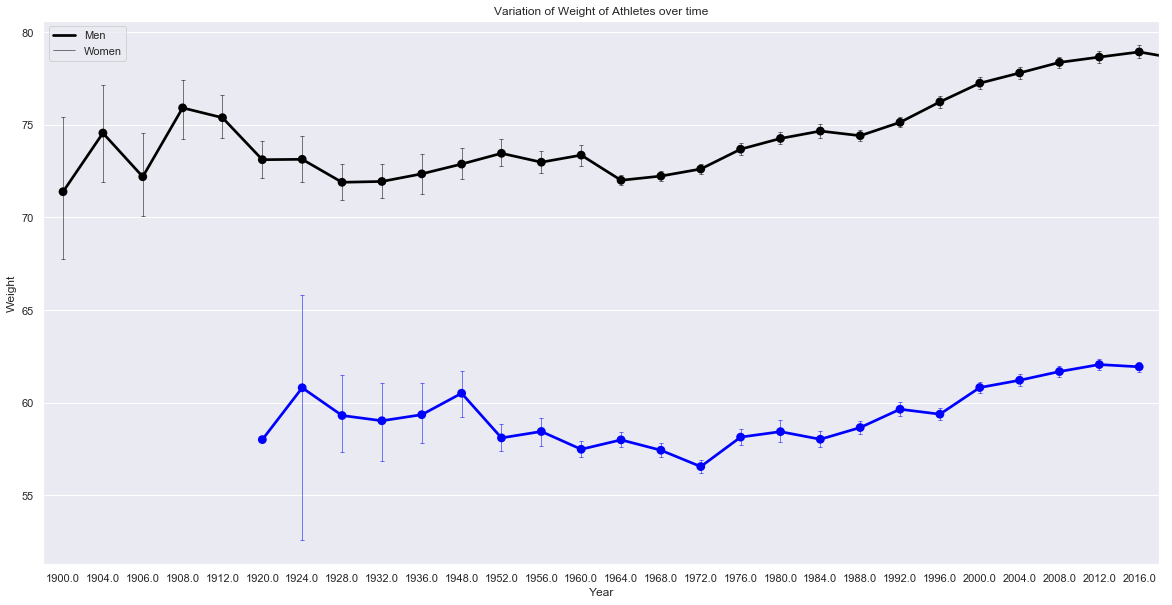

In [255]:
plt.figure(figsize=(20, 10))
ax = sns.pointplot('Year',
                   'Weight',
                   data=MenOverTime,
                   capsize=0.1,
                   errwidth=0.5,
                   color='black')
sns.pointplot('Year',
              'Weight',
              data=WomenOverTime,
              capsize=0.1,
              errwidth=0.5,
              ax=ax,
              color='blue')
plt.title('Variation of Weight of Athletes over time')
plt.legend(labels=['Men', 'Women'])